# Gradient Descent

Today, I'm going to try this method to solve a linear regression problem.

Function can be written as:

$$h(\theta)=\theta_0+\theta_1x$$

The cost function, "Squared error function", or "Mean squared error" is:

$$J(θ_0,θ_1)=\frac{1}{2}m\sum_{i=1}^m=\frac{1}{2m}(\hat{y_i}−y_i)^2=\frac{1}{2m}(h_\theta(x_i)−y_i)^2$$

Iterate until function $J(\theta)$ to 

$$Min J(θ_0,θ_1)$$ 

Iterate by:

$$ \theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j}J(θ_0,θ_1) $$

":=" means renew the value.

## Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from sklearn import preprocessing
import warnings
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
warnings.filterwarnings('ignore')

data = pd.read_csv("./Salary_Data.csv")
display(data)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


## Preprocessing

The scale of the data is too big, so we need to normalize them by:

$$ z = \frac{x-min(x)}{max(x)-min(x)} $$

In [2]:
x = data.values[:, 0]
y = data.values[:, 1]
x = preprocessing.normalize([x]).T
y = preprocessing.normalize([y]).T

## Functions

The define some functinos:

In [3]:
def h(t0, t1):
    '''linear function'''
    return t0 + t1 * x


def J(t0, t1):
    '''cost function'''
    sum = 0.5 * (1 / len(x)) * np.sum(np.power((t0 + t1 * x) - y, 2))
    return sum


def gd(t0, t1, alpha, n_iter):
    '''main function'''
    theta = [t0, t1]
    temp = np.array([t0, t1])
    cost = []

    k = 0
    while True:
        t0 = theta[0] - alpha * (1 / len(x)) * np.sum((theta[0] + theta[1] * x) - y)
        t1 = theta[1] - alpha * (1 / len(x)) * np.sum(((theta[0] + theta[1] * x) - y) * x)
        theta = [t0, t1]
        cost.append(J(t0, t1))
        temp = np.vstack([temp, theta])
        k += 1
        if k >= n_iter:
            break
    return cost, temp, theta

# Output

The result is: h = 0.06 + 0.71 * x


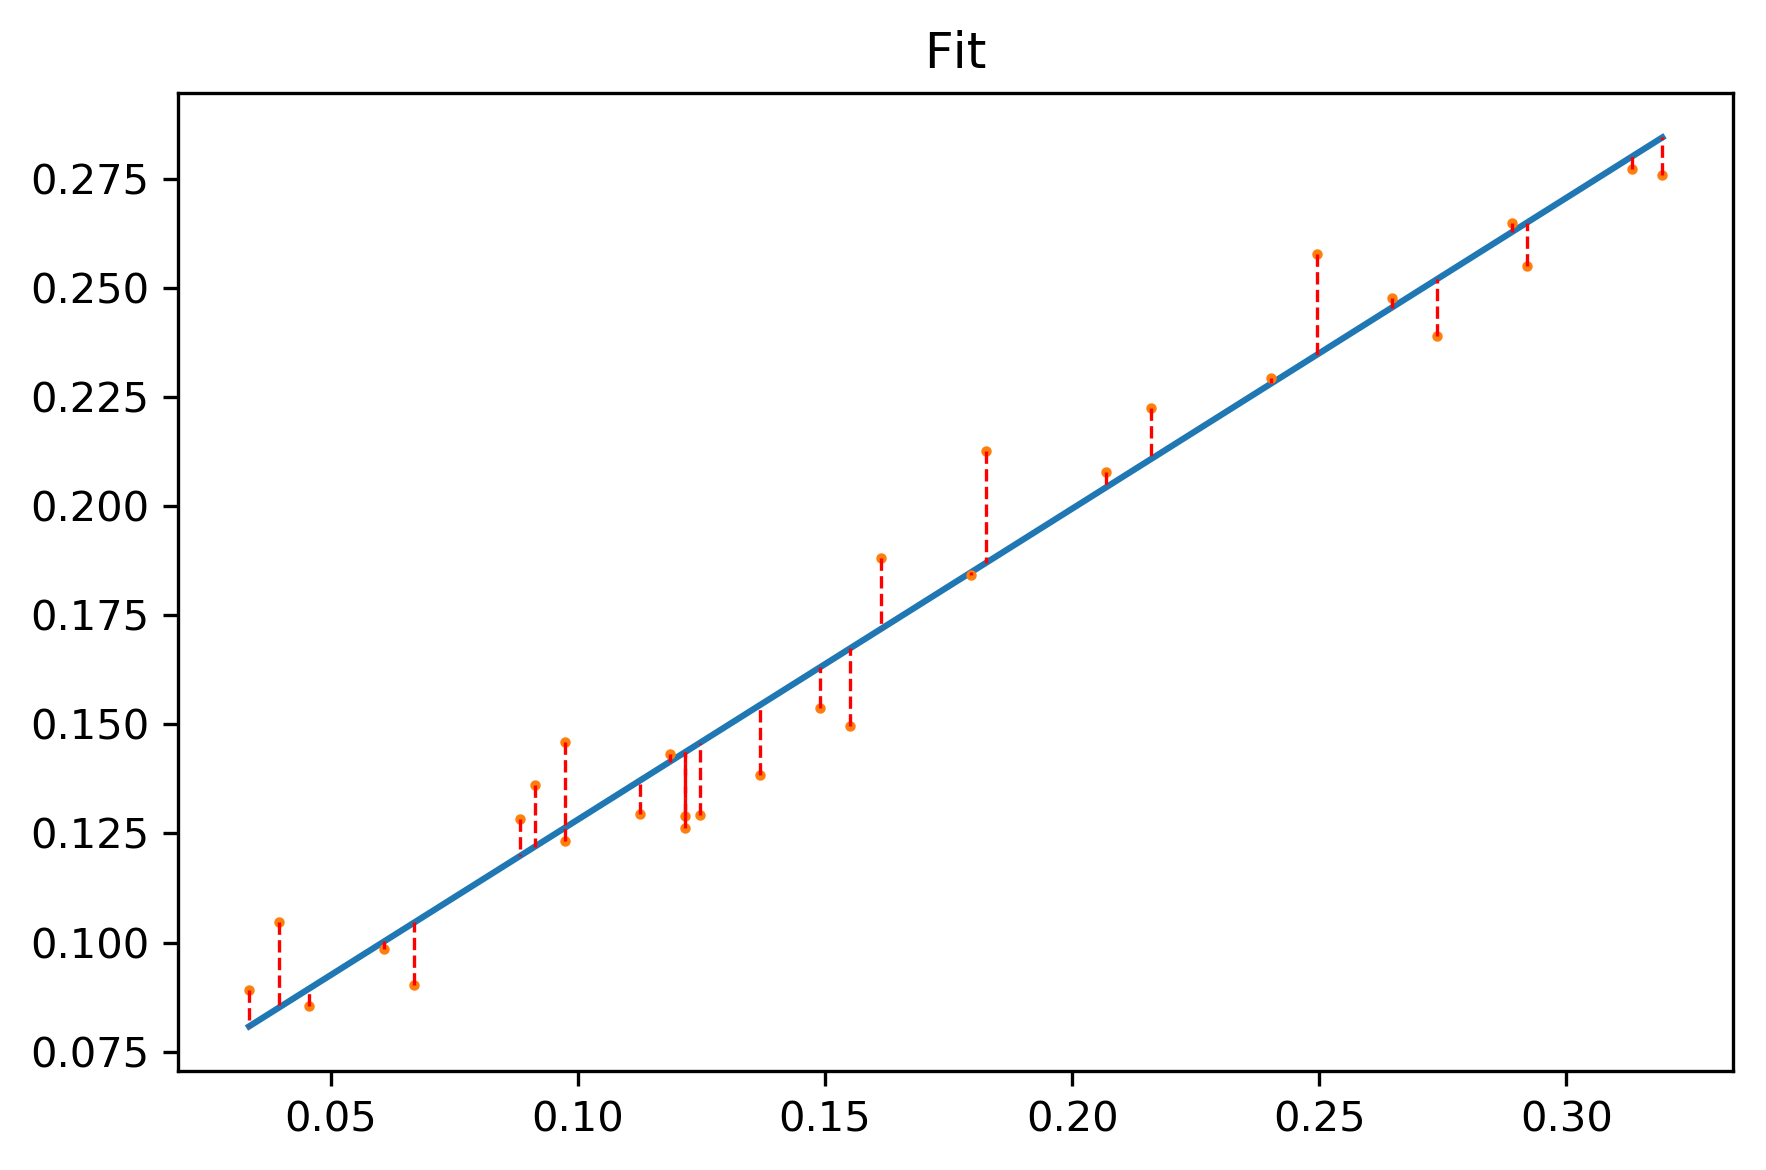

In [4]:
cost, temp, theta = gd(0, 1, 1, 500)
print("The result is: h = %.2f + %.2f * x" % (theta[0], theta[1]))
yh = h(theta[0], theta[1])
fig1 = plt.figure(dpi=150)
plt.plot(x, yh)
plt.plot(x, y, 'o', markersize=1.5)
for i in range(len(x)):
    plt.plot([x[i], x[i]], [y[i], yh[i]], "r--", linewidth=0.8)
plt.title("Fit")
plt.tight_layout()
plt.show()

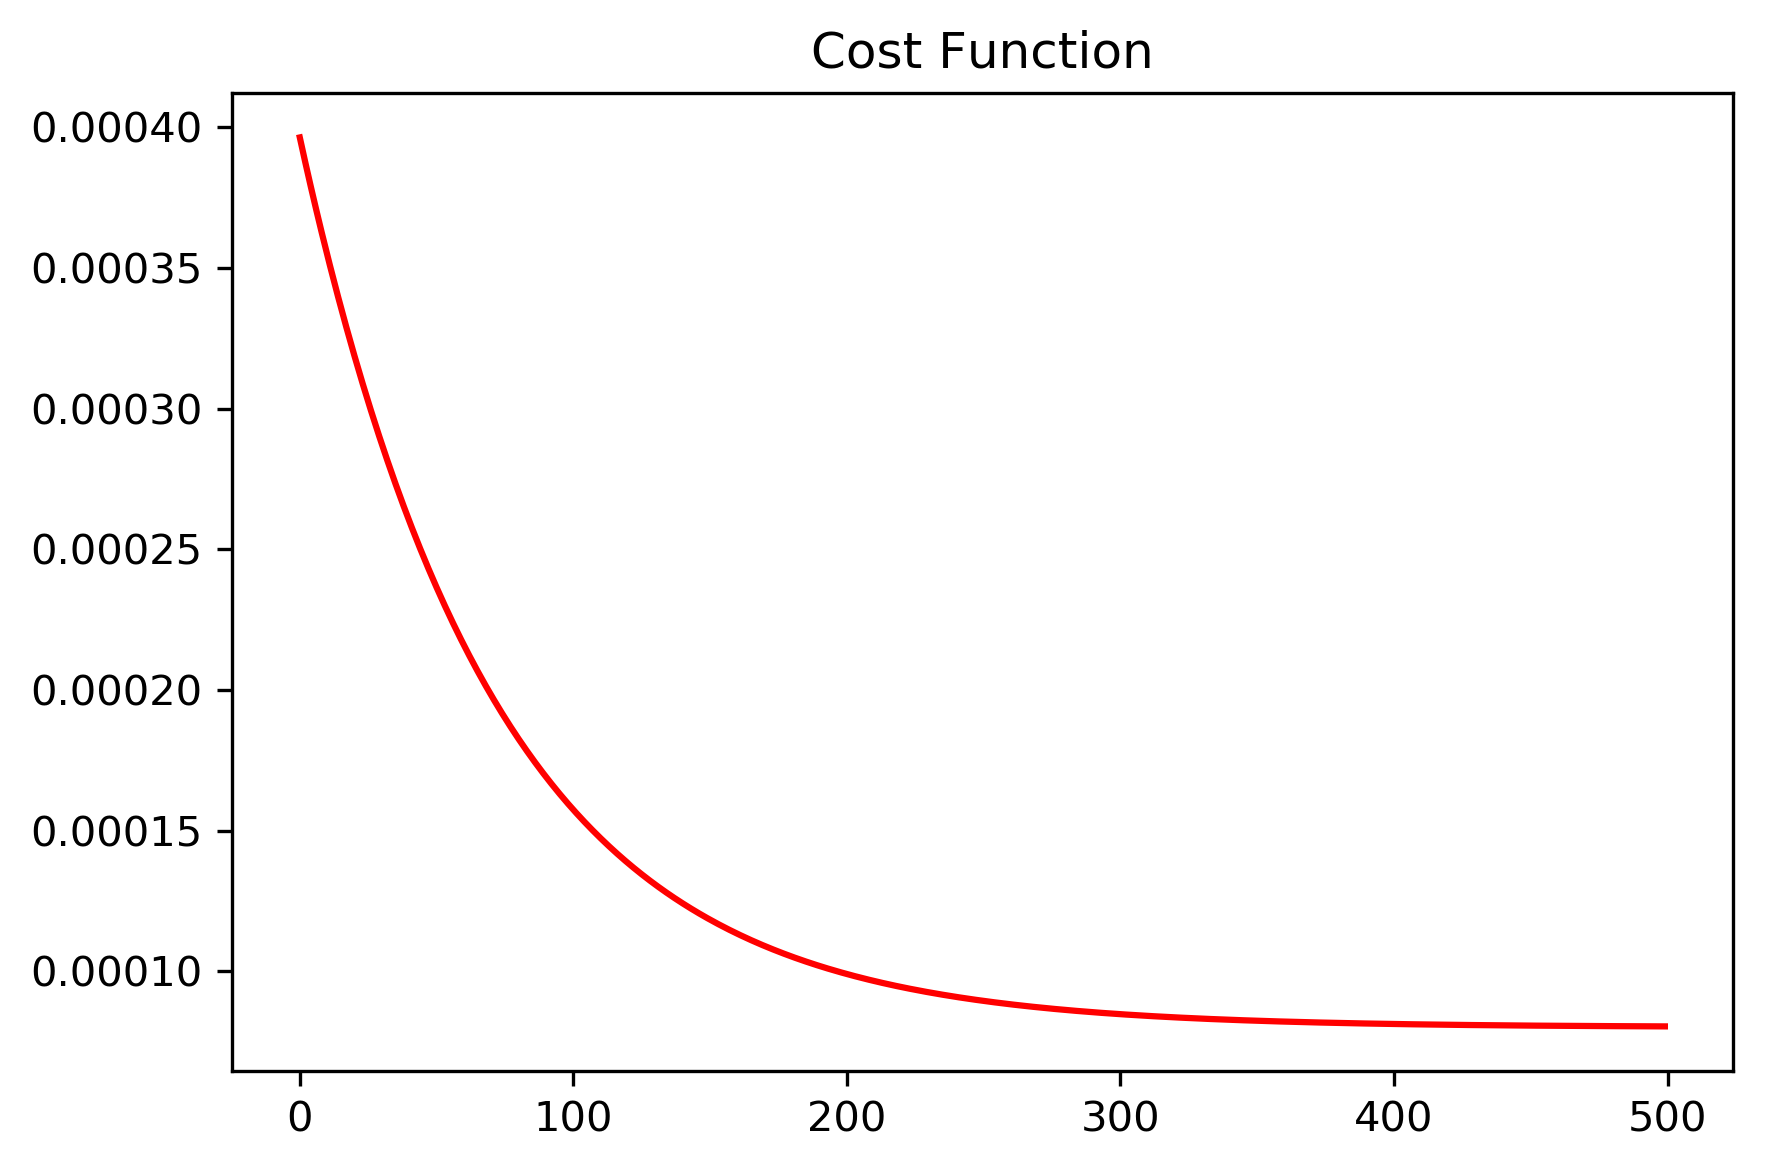

In [5]:
fig2 = plt.figure(dpi=150)
plt.plot(range(len(cost)), cost, 'r')
plt.title("Cost Function")
plt.tight_layout()
plt.show()

## Compared to Normal Equation

$$ \theta = (X^T X)^{-1} X^T y $$

In [31]:
X = x
X.shape

(30, 1)

In [32]:
one = np.ones((30, 1))
one.shape
X = np.concatenate([one, X], axis=1)

(30, 1)

In [43]:
theta = np.linalg.pinv(X.T @ X) @ X.T @ y
theta

array([[0.05839456],
       [0.70327706]])

The result is: h = 0.06 + 0.70 * x


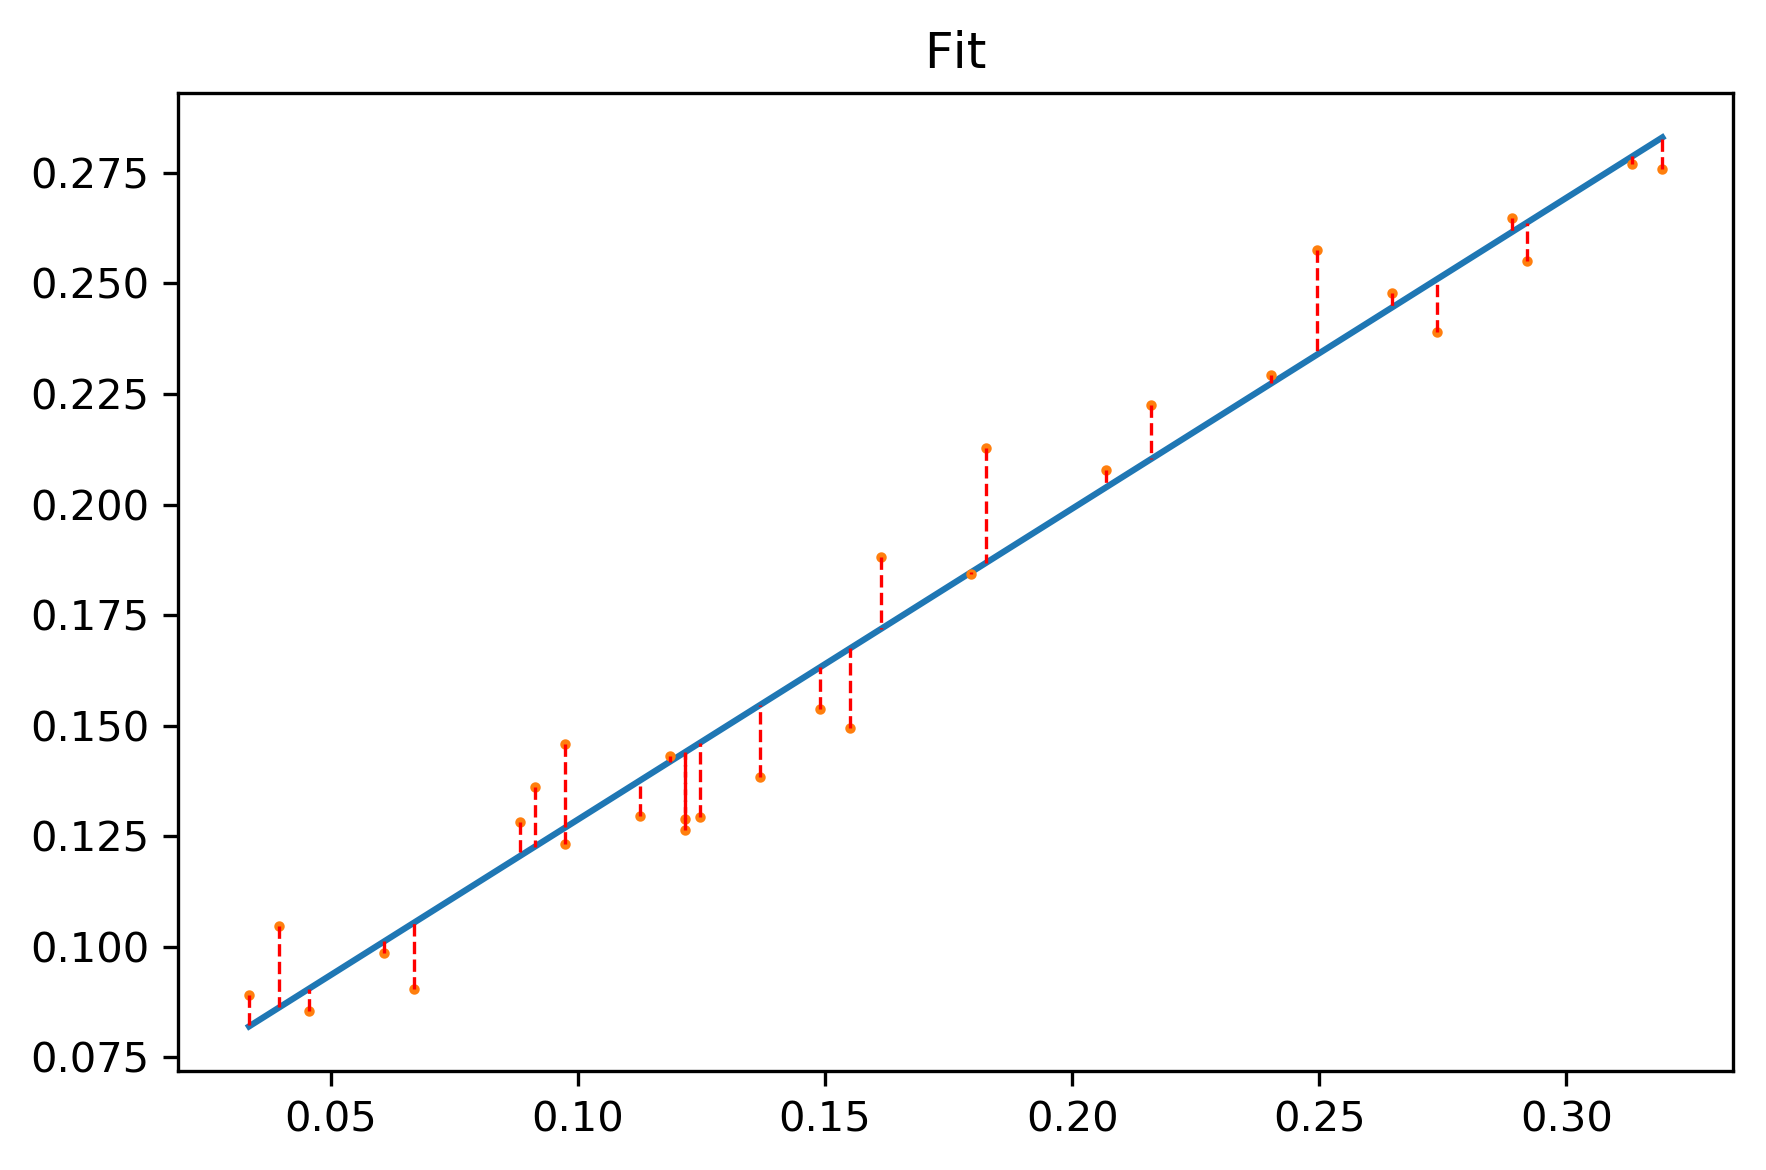

In [46]:
print("The result is: h = %.2f + %.2f * x" % (theta[0], theta[1]))
yh = h(theta[0], theta[1])
fig1 = plt.figure(dpi=150)
plt.plot(x, yh)
plt.plot(x, y, 'o', markersize=1.5)
for i in range(len(x)):
    plt.plot([x[i], x[i]], [y[i], yh[i]], "r--", linewidth=0.8)
plt.title("Fit")
plt.tight_layout()
plt.show()

In [50]:
print("gd cost:", cost[-1])
print("ne cost:", J(theta[0], theta[1]))

gd cost: 8.042499159722341e-05
ne cost: 8.014548878265756e-05


True